<a href="https://colab.research.google.com/github/NishadSoney/Project---115/blob/master/Project_115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import plotly.express as px
import pandas as pd

df = pd.read_csv("ev.csv")

score_list = df["Velocity"].tolist()
accepted_list = df["Escaped"].tolist()

fig = px.scatter(x = score_list,y = accepted_list)
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



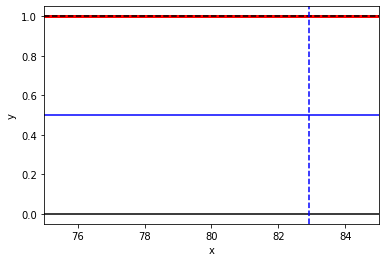

Enter your marks here 99
Student accepted


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import csv
import plotly.express as px
import pandas as pd

df = pd.read_csv("ev.csv")

score_list = df["Velocity"].tolist()
accepted_list = df["Escaped"].tolist()

score_array = np.array(score_list)
accepted_array = np.array(accepted_list)

m,c = np.polyfit(score_array,accepted_array,1)

y = []

for x in score_array:
  y_value = m*x+c
  y.append(y_value)

fig = px.scatter(x = score_array,y = accepted_array)

fig.update_layout(shapes = [dict(
    type = "line",
    y0 = min(y),y1 = max(y),
    x0 = min(score_array),x1 = max(score_array)
)])

fig.show()

#reshape is shaping the array without disturbing its data
X = np.reshape(score_list,(len(score_list),1))
Y = np.reshape(accepted_list,(len(accepted_list),1))

lr = LogisticRegression()
lr.fit(X,Y)

#ravel is used to covert 2 arrays into 1
plt.figure()
plt.scatter(X.ravel(),Y,color = "black",zorder = 20)

def model(x):
  return 1/(1+np.exp(-x))

x_test = np.linspace(0,100,200)
chances = model(x_test*lr.coef_+lr.intercept_).ravel()

plt.plot(x_test,chances,color = "red",linewidth = 3)
plt.axhline(y = 0,color = "k",linestyle = "-")
plt.axhline(y = 1,color = "k",linestyle = "--")
plt.axhline(y = 0.5,color = "b",linestyle = "-")

plt.axvline(x = x_test[165],color = "b",linestyle = "--")

plt.ylabel("y")
plt.xlabel("x")

plt.xlim(75,85)
plt.show()

user_score = float(input("Enter your marks here "))
chances = model(user_score *lr.coef_+lr.intercept_).ravel()[0]
if chances<=0.01:
  print("You are not accepted")
elif chances>=1:
  print("Student accepted")
else:
  print("Student not confirmed")